In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime
import os

In [2]:
# Функция для создания директории с текущей датой

def create_date_directory():
    current_date = datetime.now().strftime('%Y-%m-%d')
    directory_name = current_date
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    return directory_name

In [3]:
# Функция для сохранения данных в CSV

def save_data_to_csv(df, sensor_positions, directory_name):
    existing_files = [f for f in os.listdir(directory_name) if f.endswith('.csv')]
    next_file_number = len(existing_files) // 2 + 1
    
    # Имена файлов
    data_file_name = f"{directory_name}/data_{next_file_number}.csv"
    sensors_file_name = f"{directory_name}/sensors_{next_file_number}.csv"
    
    # Сохранение координат маяков в отдельный файл
    sensor_df = pd.DataFrame(sensor_positions, columns=['Sensor_X', 'Sensor_Y'])
    sensor_df.to_csv(sensors_file_name, index=False)
    
    # Сохранение данных измерений
    df.to_csv(data_file_name, index=False)
    
    return data_file_name, sensors_file_name


In [4]:
# Функция расчета RSSI

def calculate_rssi(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    
    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance)

In [5]:
# Генерация данных

def generator(
        sensor_positions: list[tuple[int, int]],
        grid_points: list[tuple[float, float]]
) -> pd.DataFrame:
    data = []
    for point in grid_points:
        rssi_values = [calculate_rssi(sensor_pos, point) for sensor_pos in sensor_positions]
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    df = pd.DataFrame(data, columns=columns)

    return df

In [6]:
def visual(df: pd.DataFrame, sensor_positions: list[tuple[int, int]]):
    # Визуализация
    plt.figure(figsize=(8, 6))

    # Тепловая карта сигнала (RSSI)
    plt.scatter(df['x'], df['y'], c=df['Avg_RSSI'], cmap='plasma', s=50, label='Grid Points')
    plt.colorbar(label='RSSI (dBm)')

    # Датчики
    for sensor in sensor_positions:
        plt.scatter(sensor[0], sensor[1], color='lime', edgecolor='black', s=200, marker='^', label='Sensor')

    # Настройки графика
    plt.title('Signal Visualization')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True, alpha=0.2)
    
    # Отображение
    plt.show()

In [7]:
# Генерация датчиков

def get_sensor_positions(n: int, num_sensors: int) -> list[tuple[int, int]]:
    possible_positions = []
    
    # Верхняя и нижняя стены
    for i in range(n):
        possible_positions.append((0, i))  # Верхняя стена
        possible_positions.append((n, i))  # Нижняя стена
    
    # Левая и правая стены (исключая углы, которые уже учтены)
    for i in range(1, n-1):
        possible_positions.append((i, 0))  # Левая стена
        possible_positions.append((i, n))  # Правая стена
    
    if num_sensors > len(possible_positions):
        raise ValueError(f"Запрошено {num_sensors} датчиков, но доступно только {len(possible_positions)} позиций на стенах")
    
    sensor_positions = random.sample(possible_positions, num_sensors)
    return sensor_positions


[(0, 0), (0, 4), (4, 4), (4, 0)]


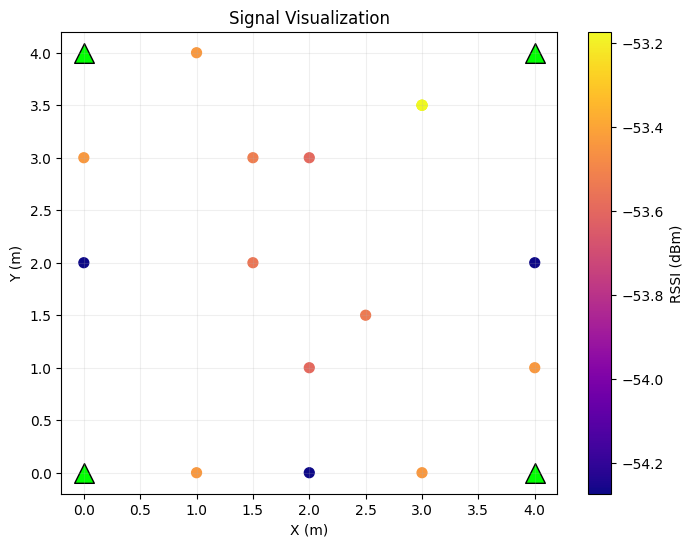

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,Avg_RSSI
0,0.0,3.0,-54.313638,-40.000000,-58.456734,-60.969100,-53.434868
1,0.0,2.0,-49.030900,-49.030900,-59.515450,-59.515450,-54.273175
2,1.0,0.0,-40.000000,-58.456734,-60.969100,-54.313638,-53.434868
3,2.0,0.0,-49.030900,-59.515450,-59.515450,-49.030900,-54.273175
4,3.0,0.0,-54.313638,-60.969100,-58.456734,-40.000000,-53.434868
5,4.0,1.0,-58.456734,-60.969100,-54.313638,-40.000000,-53.434868
6,4.0,2.0,-59.515450,-59.515450,-49.030900,-49.030900,-54.273175
7,1.0,4.0,-58.456734,-40.000000,-54.313638,-60.969100,-53.434868
8,3.0,3.5,-59.910384,-54.492126,-41.453650,-56.833238,-53.172350
9,3.0,3.5,-59.910384,-54.492126,-41.453650,-56.833238,-53.172350


In [8]:
num_points = 10
room_size = 4
num_sensors = 4
sensor_positions = [(0, 0), (0, 4), (4, 4), (4, 0)]

grid_points = [
    (0.0, 3.0),
    (0.0, 2.0),
    (1.0, 0.0),
    (2.0, 0.0),
    (3.0, 0.0),
    (4.0, 1.0),
    (4.0, 2.0),
    (1.0, 4.0),
    (3.0, 3.5),
    (3.0, 3.5),
    (1.5, 3.0),
    (2.0, 3.0),
    (1.5, 2.0),
    (3.0, 3.5),
    (2.0, 1.0),
    (2.5, 1.5),
]

grid_size = 10
# grid_points = []

# x = np.linspace(0, room_size, grid_size)
# y = np.linspace(0, room_size, grid_size)
# xx, yy = np.meshgrid(x, y)
# grid_points = list(zip(xx.flatten(), yy.flatten()))


# Случайные генерации
# sensor_positions = get_sensor_positions(room_size, num_sensors)
# x = np.random.uniform(0, room_size, num_points)
# y = np.random.uniform(0, room_size, num_points)
# grid_points = list(zip(x, y))

print(sensor_positions)

df = generator(sensor_positions=sensor_positions, grid_points=grid_points)
visual(df=df, sensor_positions=sensor_positions)

directory_name = create_date_directory()
file_name = save_data_to_csv(df, sensor_positions, directory_name)

df

In [9]:
def calculate_rssi_with_noise(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    noise_std_dev = 2  # Стандартное отклонение шума
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    noise = np.random.normal(0, noise_std_dev)

    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance) + noise


In [10]:
def generator_with_noise(
        sensor_positions: list[tuple[int, int]],
        grid_points: list[tuple[float, float]]
) -> pd.DataFrame:
    data = []
    for point in grid_points:
        rssi_values = []
        for sensor_pos in sensor_positions:
            measurements = [calculate_rssi_with_noise(sensor_pos, point) for _ in range(10)]
            avg_measurement = np.mean(measurements)
            rssi_values.append(avg_measurement)
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    return pd.DataFrame(data, columns=columns)


[(0, 0), (0, 4), (4, 4), (4, 0)]


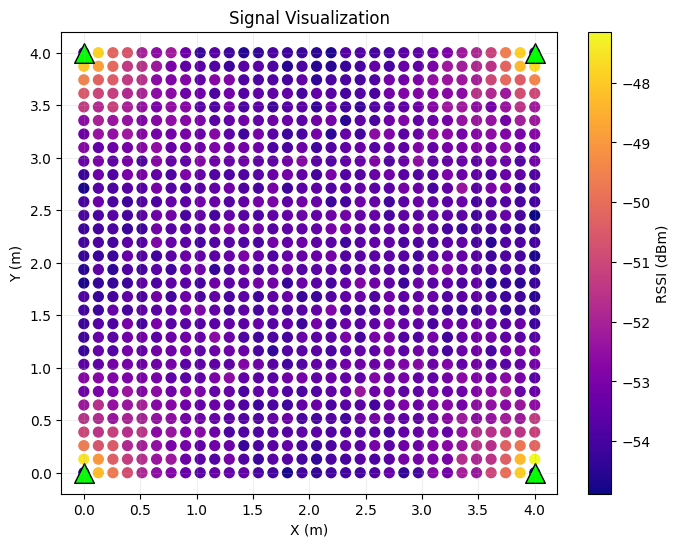

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,Avg_RSSI
0,0.000000,0.0,-40.000000,-58.546058,-62.642308,-57.838382,-54.756687
1,0.129032,0.0,-13.265578,-57.930928,-63.637801,-58.127475,-48.240445
2,0.258065,0.0,-22.091823,-57.240349,-61.462022,-58.010204,-49.701099
3,0.387097,0.0,-27.230522,-57.599408,-61.809750,-56.621286,-50.815241
4,0.516129,0.0,-31.506256,-57.188591,-62.486476,-56.353177,-51.883625
...,...,...,...,...,...,...,...
1019,3.483871,4.0,-61.952743,-55.869296,-31.486275,-58.172561,-51.870219
1020,3.612903,4.0,-62.463805,-56.380903,-28.942628,-56.660416,-51.111938
1021,3.741935,4.0,-62.072724,-57.244938,-21.758328,-57.327432,-49.600855
1022,3.870968,4.0,-61.432207,-56.870749,-14.188969,-59.053533,-47.886364


In [11]:
sensor_positions = [(0, 0), (0, 4), (4, 4), (4, 0)]

grid_size = 32
grid_points = []

x = np.linspace(0, room_size, grid_size)
y = np.linspace(0, room_size, grid_size)
xx, yy = np.meshgrid(x, y)
grid_points = list(zip(xx.flatten(), yy.flatten()))


# Случайные генерации
# sensor_positions = get_sensor_positions(room_size, num_sensors)
# x = np.random.uniform(0, room_size, num_points)
# y = np.random.uniform(0, room_size, num_points)
# grid_points = list(zip(x, y))

print(sensor_positions)

df = generator_with_noise(sensor_positions=sensor_positions, grid_points=grid_points)
visual(df=df, sensor_positions=sensor_positions)

directory_name = create_date_directory()
file_name = save_data_to_csv(df, sensor_positions, directory_name)

df

In [12]:
print(file_name)

('2025-04-09/data_2.csv', '2025-04-09/sensors_2.csv')
